# Amazon Fine Food Reviews Analysis 

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews 

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10<br>

Attribute Information:

Id<br>
ProductId - unique identifier for the product<br>
UserId - unqiue identifier for the user<br>
ProfileName<br>
HelpfulnessNumerator - number of users who found the review helpful<br>
HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not<br>
Score - rating between 1 and 5<br>
Time - timestamp for the review<br>
Summary - brief summary of the review<br>
Text - text of the review<br>

Objective:<br>
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).<br><br>


[Q] How to determine if a review is positive or negative?<br><br>

[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Reading Data

In [2]:
# Establishing connection with sqlite3
con = sqlite3.connect(r"C:\Users\suraj\ML_Projects\My\Practice\3_NLP- AmazonFoodreviews\database.sqlite")

In [3]:
data =  pd.read_sql_query("select * from Reviews where score != 3", con)

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
data.shape

(525814, 10)

### Replacing score as 1 and 0

In [6]:
#replacing values (4,5) with 1 and (1,2) as 0
score_list=[]
for s in data["Score"]:
    if s > 3:
        score_list.append(1)
    else:
        score_list.append(0)

In [7]:
data["Score"] = score_list

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
data.shape

(525814, 10)

## EDA

### Deduplication

In [10]:
pd.read_sql_query("select * from reviews where UserId='#oc-R11D9D7SHXIJB9'",con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,290948,B005HG9ESG,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
1,455534,B005HG9ERW,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."
2,496894,B005HG9ET0,#oc-R11D9D7SHXIJB9,"Louis E. Emory ""hoppy""",0,0,5,1342396800,Muscle spasms,"My wife has recurring extreme muscle spasms, u..."


In Above table we can observe that the same user at same time has given the same the review for different products, which seems wrong. Hence the data is duplicate which should be removed

In [11]:
# droping duplicate values

sorted_data = data.sort_values("ProductId", inplace = False, kind="quicksort", ascending=True, axis=0, na_position="last")

final = sorted_data.drop_duplicates(subset={"UserId", "ProfileName", "Time","Text"}, keep="first", inplace=False)

In [12]:
final.shape

(364173, 10)

In [13]:
sorted_data.shape

(525814, 10)

We can also observe that at some places the HelpfulnessNumerator is more than HelpfulnessDenominator, which shouldn't. Hence shuch data should be removed.

In [14]:
# Removing datapoints whose Helpfulnumerator value is greater than helpfulnessdenominator
final =final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

In [15]:
final.shape

(364171, 10)

In [16]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(data['Id'].size*1.0)*100

69.25852107399194

In [17]:
#How many positive and negative reviews are present in our dataset?
final["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [18]:
final.shape

(364171, 10)

# PreProcessing

## Preprocessing ReviewText
Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [38]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tqdm import tqdm_notebook

In [39]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element

# function for decontacting the words
def contractions(text):
    #specifics
    phrase = re.sub(r"don't","do not",text)
    phrase = re.sub(r"can't", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [40]:
# https://gist.github.com/sebleier/554280
# removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [41]:
final["Text"].values[12670]

"I have been a big believer in Bragg's Apple Cider Vinegar with Mother for acid reflux.  While ordering more vinegar I decided to try a bottle of their Olive Oil and it is very good and at a very good price for organic Olive Oil.  The packing was amazing, I think you could have dropped the box off the top of a building and the bottle would be protected.  It took me quite awhile to get the tons of bubble wrap off the bottle.  But then again, it's a good thing, you don't want a broken bottle of Olive Oil."

In [42]:
# removing urls, html tags, alpha numeric characters, special charatcers and stopwords
# Combining all of the above concepts

preprocessed_reviews = []
# tqdm is for printing the status bar
for review in tqdm_notebook(final["Text"].values):
    sentence = re.sub(r"http\S+","",review)
    sentence = BeautifulSoup(sentence, "lxml").get_text()
    sentence = contractions(sentence)
    sentence = re.sub(r"\S*\d\S*","", sentence).strip()
    sentence = re.sub(r"[^A-Za-z0-9]+"," ",sentence)
    sentence = ' '.join(sen.lower() for sen in sentence.split() if sen.lower() not in stopwords)
    preprocessed_reviews.append(sentence.strip())

In [43]:
# Adding cleaned reviews into Text column
final["Text"] = preprocessed_reviews

###  Preprocessing summary

In [44]:
# stemming
#sno = SnowballStemmer("english")

preprocessed_summary = []
# Combining all of the above concepts
# tqdm is for printing the status bar
for review in tqdm_notebook(final["Summary"].values):
    sentence = re.sub(r"http\S+","",review)
    sentence = BeautifulSoup(sentence, "lxml").get_text()
    sentence = contractions(sentence)
    sentence = re.sub(r"\S*\d\S*","", sentence).strip()
    sentence = re.sub(r"[^A-Za-z0-9]+"," ",sentence)
    sentence = ' '.join(sen.lower() for sen in sentence.split() if sen.lower() not in stopwords)
    #sentence = ' '.join(sno.stem(sen) for sen in sentence.split())
    preprocessed_summary.append(sentence.strip())

C:\Users\suraj\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\suraj\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\suraj\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\suraj\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\suraj\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarnin

In [45]:
preprocessed_summary[12670]

'bragg brand good'

In [46]:
final["Summary"] = preprocessed_summary

In [47]:
final.shape

(364171, 10)

In [48]:
final["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [49]:
cleaned = final
cleaned.shape

(364171, 10)

In [50]:
cleaned["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [51]:
cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,every book educational,witty little book makes son laugh loud recite ...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,love book miss hard cover version,grew reading sendak books watching really rosi...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup rice months,fun way children learn months year learn poems...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,good swingy rhythm reading aloud,great little book read aloud nice rhythm well ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,great way learn months,book poetry months year goes month cute little...


## Saving Cleaned data into database for future use

In [52]:
# storing all the cleand data into database for future reference
conn = sqlite3.connect('cleaned.sqlite')
c=conn.cursor()
conn.text_factory = str
cleaned.to_sql('Reviews', conn, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [86]:
# retreving cleaned data from database

con = sqlite3.connect('cleaned.sqlite')

final_data = pd.read_sql_query("select * from Reviews", con)

In [87]:
final_data["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [88]:
final_data.shape  # defaluting index was added by sqlite at start due to which columns increased from 10 -> 11

(364171, 11)

In [100]:
# selecting sample of 100k

final_data = cleaned_data.sample(100000)

In [101]:
final_data["Score"].value_counts()

1    84372
0    15628
Name: Score, dtype: int64

## Dealing with Imbalaced Data

From value counts we can observe that the data is imbalanced , hence the naive bayes gets affected by imbalaced data noticeably, or the naive bayes is influced by the majority class. The techniques to deal with imbalanced data are:

    1) Undersampling
    2) Oversampling
    3) Creating Artificial DataPoints.
    4) Class weight

In this case I will we performing Oversampling. ie I will create more negative points.

In [ ]:
### Separating positive and negative reviews
"""
cleaned_positive = pd.DataFrame(cleaned_data[cleaned_data["Score"] == 1])
cleaned_negative = pd.DataFrame(cleaned_data[cleaned_data["Score"] == 0])
print(cleaned_positive.shape, cleaned_negative.shape)"""

In [80]:
"""
positive_review_counts, negative_review_counts = cleaned_data["Score"].value_counts()

### Sampling the negative points and making it equal to positive points.
cleaned_negative = cleaned_negative.sample(positive_review_counts, replace=True)
print("Oversampled Negative datapoints shape:",cleaned_negative.shape)

### Concatenating positive and negative reviews
balanced_reviews = pd.concat([cleaned_positive, cleaned_negative])
print("Shape after concatenated: ",balanced_reviews.shape)

### Shuffling positive and Negative reviews
cleaned_data = balanced_reviews.sample(frac=1).reset_index(drop=True)
"""

In [ ]:
# cleaned_data.Score.value_counts()

We have Successfully balanced the data

In [81]:
### selecting sample of 300k

# final_data = cleaned_data.sample(50000)

In [82]:
# final_data.shape

In [78]:
# final_data["Score"].value_counts()

# Applying KNN brute force

### Applying KNN using "k-fold" on BOW

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [116]:
# Creating function to get optimal/best k

def optimal_k(x,y):
    
    cv_scores = []
    neighbors = list(range(1,50,2))
    roc_auc_score = []
    #performing 10-fold CV
    for k in tqdm_notebook(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        
        #code is for accuracy score
        cross_aucc_score = cross_val_score(knn, x,y, cv=10, scoring="accuracy")
        cv_scores.append(cross_aucc_score.mean())
        
        #code for  roc_auc score
        cross_roc_auc_score = cross_val_score(knn, x,y, cv=10, scoring="roc_auc")
        roc_auc_score.append(cross_roc_auc_score.mean())
        
    # MissClassificationScore i.e 1-accuracy
    MSE = [(1-x) for x in cv_scores]   
    
    #optimalk using accuracy
    optimalK = neighbors[MSE.index(min(MSE))]
    
    #optimalK using auc
    optimalK_roc = neighbors[roc_auc_score.index(max(roc_auc_score))]
    
    print(f"K using accuracy {optimalK} \n K using roc_auc {optimalK_roc}")
    
    #Plotting Train_Test_CV_Error Graph
    #plt.figure(figsize=(10,10))
    plt.plot(neighbors, MSE)
    #adding text to xy points
    for xy in zip(neighbors, np.round(MSE,2)):
        plt.annotate(f'{xy}', xy, textcoords='data')
    plt.xlabel("K")
    plt.ylabel("MSE")
    plt.title("Train_Test_CV_Error")
    plt.show()
    
    # Plotting grpad for k vs roc_auc_score
    plt.plot(neighbors, roc_auc_score)
    plt.plot(neighbors, roc_auc_score, "ro")
    plt.xlabel("K")
    plt.ylabel("Auc")
    plt.show()
    
    return optimalK

In [113]:
# Splitting my data into Train and test 
from sklearn.model_selection import train_test_split as tts

X = final_data["Text"].values
Y = final_data["Score"].values

X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(70000,) (70000,)
(30000,) (30000,)


In [114]:
# Featurization -> Text to BOW

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


In [115]:
print(X_train_bow.shape,X_test_bow.shape)

(70000, 50806) (30000, 50806)


In [ ]:
# getting Optimal_k value returned by optimal_k()

optimalK = optimal_k(X_train_bow, y_train)
optimalK

### KNN model

In [110]:
# Creating Knn model using optimal-k 

optimal_knn = KNeighborsClassifier(n_neighbors=optimalK)

# training the model
optimal_knn.fit(X_train_bow, y_train)

# predicting values using test data
pred = optimal_knn.predict(X_test_bow)

# Checking accuracy against the predicted y and y_test
accuracy = accuracy_score(y_test, pred, normalize=True)*float(100)
print(f"Accuracy at optimal_k = {optimalK}  on Test data is {round(accuracy,2)}")

# Checking accuracy in train data

pred_train = optimal_knn.predict(X_train_bow)
accuracy_train = accuracy_score(y_train, pred_train)*float(100)
print(f"\n Accuracy at optimal_k = {optimalK} on Train data is {round(accuracy_train,2)}")

NameError: name 'optimalK' is not defined

Observation:

The accuracy on train data and accuracy of test data is almost same.


Hence we can conclude that the bias and variance is well balanced

In [72]:
# Generating Confusion Matrix

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, pred)
con_mat

array([[4771, 2597],
       [2475, 5157]], dtype=int64)

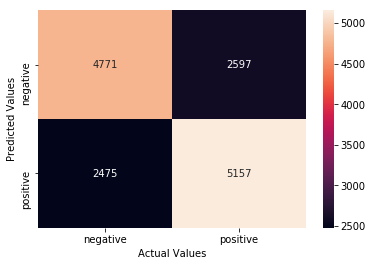

In [73]:
# Heatmap

import seaborn as sns

df =pd.DataFrame(con_mat,index=["negative","positive"], columns=["negative","positive"])

sns.heatmap(df, annot=True ,fmt="d")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [75]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      7368
           1       0.67      0.68      0.67      7632

   micro avg       0.66      0.66      0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



# Applying  Knn on Tf - Idf 

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Splitting my data into Train and test 
from sklearn.model_selection import train_test_split as tts

X = final_data["Text"].values
Y = final_data["Score"].values

X_train_tf, X_test_tf, y_train_tf, y_test_tf = tts(X, Y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35000,) (35000,)
(15000,) (15000,)


In [80]:
# Featurization -> Text to tf-idf

tf_vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10)

x_train_tf = tf_vectorizer.fit_transform(X_train_tf)
x_test_tf = tf_vectorizer.transform(X_test_tf)


print(X_train_bow.shape,X_test_bow.shape)

(35000, 35927) (15000, 35927)




  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

  4%|███▎                                                                               | 1/25 [01:16<30:44, 76.84s/it]

  8%|██████▋                                                                            | 2/25 [02:40<30:14, 78.90s/it]

 12%|█████████▉                                                                         | 3/25 [04:16<30:47, 83.96s/it]

 16%|█████████████▎                                                                     | 4/25 [05:48<30:18, 86.58s/it]

 20%|████████████████▌                                                                  | 5/25 [07:24<29:43, 89.17s/it]

 24%|███████████████████▉                                                               | 6/25 [09:00<28:55, 91.34s/it]

 28%|███████████████████████▏                                                           | 7/25 [10:37<27:54, 93.03s/it]

 32%|█████████████████████████

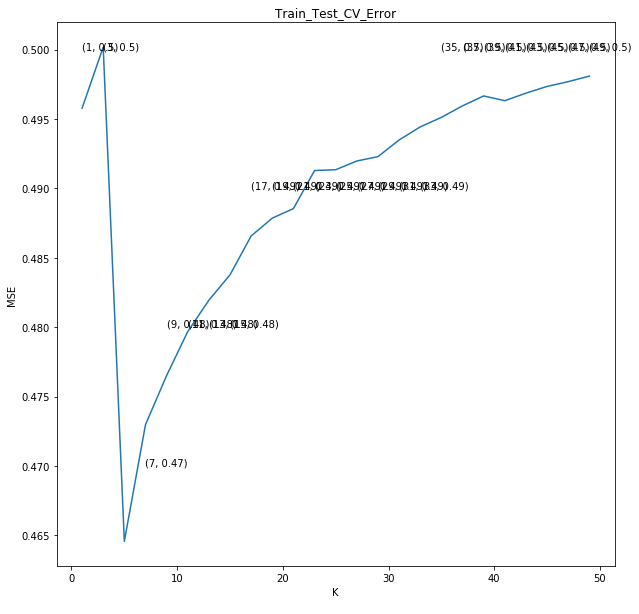

5

In [81]:
# getting optimum value of k from function optimal_k()

optimal_k_tf = optimal_k(x_train_tf, y_train_tf)
optimal_k_tf

In [86]:
# KNN Model using Tf-idf

#initializing model
knn_tf = KNeighborsClassifier(n_neighbors=optimal_k_tf)

# train knn model
knn_tf.fit(x_train_tf, y_train_tf)

# Testing model
pred_tf = knn_tf.predict(x_test_tf)

# Accuracy on test data
accuracy_test = accuracy_score(y_test_tf, pred_tf)*float(100)

# Accuracy on train data
accuracy_train = accuracy_score(y_train_tf, knn_tf.predict(x_train_tf))*float(100)

print("Test Accuracy", accuracy_test)
print("Train accuracy", accuracy_train)

Test Accuracy 54.11333333333334
Train accuracy 70.86571428571429


In [90]:
# Generating Confusion Matrix

cm_tf = confusion_matrix(y_test_tf, pred_tf)
cm_tf

array([[2453, 4915],
       [1968, 5664]], dtype=int64)

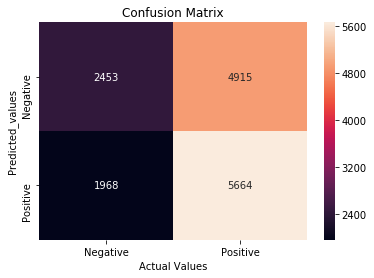

In [89]:
# generating Heatmap

df = pd.DataFrame(cm_tf, index=["Negative","Positive"], columns=["Negative", "Positive"])
sns.heatmap(df, annot=True, fmt="d")
plt.xlabel("Actual Values")
plt.ylabel("Predicted_values")
plt.title("Confusion Matrix")
plt.show()

In [92]:
#generating classification report
print(classification_report(y_test_tf, pred_tf))

              precision    recall  f1-score   support

           0       0.55      0.33      0.42      7368
           1       0.54      0.74      0.62      7632

   micro avg       0.54      0.54      0.54     15000
   macro avg       0.55      0.54      0.52     15000
weighted avg       0.54      0.54      0.52     15000

